# import required libraries

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv file and understand the datset

In [138]:
df = pd.read_csv('titanic.csv')

In [139]:
df.info()
# non primitive data type--> object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [140]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [141]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [142]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


# DATA CLEANING

In [143]:
# check for duplicates and handle them
# check for missing values
# check for invalid datatypes and handle them
# remove the unwanted columns

In [144]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [145]:
df.duplicated().any()  # no duplicates exists

np.False_

In [146]:
df.isnull()  ## getting many data so i will use .sum()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,False
1305,False,False,False,True,False,False,False,False,True,False,False
1306,False,False,False,False,False,False,False,False,True,False,False
1307,False,False,False,False,False,False,False,False,True,False,False


In [147]:
df.isna().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

'age','fare'--> (its numerical data hence we can use)--> mean/median/zero
'embarked'---> mode/unknown
'cabin'---> will drop bcoz not appropriate and more null found

<Axes: xlabel='age'>

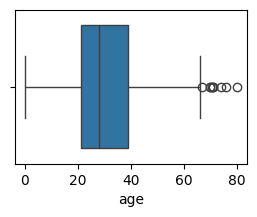

In [148]:
plt.figure(figsize=(3,2))
sns.boxplot(df,x='age')
# sns.boxplot(df,x='fare)
# any one should execute at a time 

<Axes: xlabel='fare'>

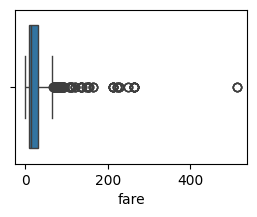

In [149]:
plt.figure(figsize=(3,2))
sns.boxplot(df,x='fare')


In [150]:
# df['age']=df['age'].median()

In [151]:
df['age']=df['age'].fillna(28.0)  # median brought from describe--50% (--df['age'].median()--)

In [152]:
df['fare']=df['fare'].fillna(14.45) # return type column-->Series

In [153]:
df['fare'].median()

np.float64(14.4542)

In [154]:
df['embarked'].mode()  #returns Series ( mode means highest occured value)

0    S
Name: embarked, dtype: object

In [155]:
m = df['embarked'].mode()[0] ## by applying indexing 
df['embarked']=df['embarked'].fillna(m) 

In [156]:
df.info()  # clarify using info() and later drop unwanted columns 
# except for cabin everything is filled with 1309

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [157]:
df.dropna(axis=1)  # check without using = (check and later assign and change)

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


In [158]:
df=df.dropna(axis=1)
# assign DataFrame if it returns dataframe, Series if the return type is Series

no invalid data types (missing values are handled)

In [159]:
# apply,groupby,value_counts,unique,nunique

# DATA TRANSFORMATION (FEATURE ENGINEERING) 

In [160]:
# 1. create the new columns from an existing columns for data analysis
# 2. Remove the unwanted columns

In [161]:
df['pclass'].unique() # 

array([1, 2, 3])

In [162]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


In [163]:
df['name'].str.split(',')  # cleaning the name column

0                        [Allen,  Miss. Elisabeth Walton]
1                       [Allison,  Master. Hudson Trevor]
2                         [Allison,  Miss. Helen Loraine]
3                 [Allison,  Mr. Hudson Joshua Creighton]
4       [Allison,  Mrs. Hudson J C (Bessie Waldo Danie...
                              ...                        
1304                              [Zabour,  Miss. Hileni]
1305                             [Zabour,  Miss. Thamine]
1306                         [Zakarian,  Mr. Mapriededer]
1307                               [Zakarian,  Mr. Ortin]
1308                                [Zimmerman,  Mr. Leo]
Name: name, Length: 1309, dtype: object

In [164]:
df['name'].str.split(',',expand=True)  # expand True converts list into columns

,0,1
0,Allen,Miss. Elisabeth Walton
1,Allison,Master. Hudson Trevor
2,Allison,Miss. Helen Loraine
3,Allison,Mr. Hudson Joshua Creighton
4,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Zabour,Miss. Hileni
1305,Zabour,Miss. Thamine
1306,Zakarian,Mr. Mapriededer
1307,Zakarian,Mr. Ortin


In [165]:
df[['lname','temp']] = df['name'].str.split(',',expand=True) # creating new columns by last splitting
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin


In [166]:
df['temp'].str.split('.',expand=True) 

,0,1,2
0,Miss,Elisabeth Walton,None
1,Master,Hudson Trevor,None
2,Miss,Helen Loraine,None
3,Mr,Hudson Joshua Creighton,None
4,Mrs,Hudson J C (Bessie Waldo Daniels),None
...,...,...,...
1304,Miss,Hileni,None
1305,Miss,Thamine,None
1306,Mr,Mapriededer,None
1307,Mr,Ortin,None


In [167]:
df['temp'].str.split('.',n=1,expand=True)


,0,1
0,Miss,Elisabeth Walton
1,Master,Hudson Trevor
2,Miss,Helen Loraine
3,Mr,Hudson Joshua Creighton
4,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Miss,Hileni
1305,Miss,Thamine
1306,Mr,Mapriededer
1307,Mr,Ortin


In [168]:
df[['courtesy_title','fname']] = df['temp'].str.split('.',n=1,expand=True)
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin


In [169]:
#lets drop unwanted columns
df = df.drop(columns=['name','temp'])
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname
0,1,female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss,Elisabeth Walton
1,1,male,0.9167,1,2,113781,151.5500,S,1,Allison,Master,Hudson Trevor
2,1,female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss,Helen Loraine
3,1,male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss,Hileni
1305,3,female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss,Thamine
1306,3,male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr,Mapriededer
1307,3,male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr,Ortin


In [170]:
for col in ['age','fare']:
    print(df[col].round(1))

0       29.0
1        0.9
2        2.0
3       30.0
4       25.0
        ... 
1304    14.5
1305    28.0
1306    26.5
1307    27.0
1308    29.0
Name: age, Length: 1309, dtype: float64
0       211.3
1       151.6
2       151.6
3       151.6
4       151.6
        ...  
1304     14.5
1305     14.5
1306      7.2
1307      7.2
1308      7.9
Name: fare, Length: 1309, dtype: float64


In [171]:
for col in ['age','fare']:
    df[col] = df[col].round(1)

In [172]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname
0,1,female,29.0,0,0,24160,211.3,S,1,Allen,Miss,Elisabeth Walton
1,1,male,0.9,1,2,113781,151.6,S,1,Allison,Master,Hudson Trevor
2,1,female,2.0,1,2,113781,151.6,S,0,Allison,Miss,Helen Loraine
3,1,male,30.0,1,2,113781,151.6,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.0,1,2,113781,151.6,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,0,2665,14.5,C,0,Zabour,Miss,Hileni
1305,3,female,28.0,1,0,2665,14.5,C,0,Zabour,Miss,Thamine
1306,3,male,26.5,0,0,2656,7.2,C,0,Zakarian,Mr,Mapriededer
1307,3,male,27.0,0,0,2670,7.2,C,0,Zakarian,Mr,Ortin


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pclass          1309 non-null   int64  
 1   sex             1309 non-null   object 
 2   age             1309 non-null   float64
 3   sibsp           1309 non-null   int64  
 4   parch           1309 non-null   int64  
 5   ticket          1309 non-null   object 
 6   fare            1309 non-null   float64
 7   embarked        1309 non-null   object 
 8   survived        1309 non-null   int64  
 9   lname           1309 non-null   object 
 10  courtesy_title  1309 non-null   object 
 11  fname           1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [174]:
df.columns[[1,9,10,11]]

Index(['sex', 'lname', 'courtesy_title', 'fname'], dtype='object')

In [175]:
# by using position of the columns  
for col in df.columns[[1,9,10,11]]:
    df[col]=df[col].str.title()

In [176]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname
0,1,Female,29.0,0,0,24160,211.3,S,1,Allen,Miss,Elisabeth Walton
1,1,Male,0.9,1,2,113781,151.6,S,1,Allison,Master,Hudson Trevor
2,1,Female,2.0,1,2,113781,151.6,S,0,Allison,Miss,Helen Loraine
3,1,Male,30.0,1,2,113781,151.6,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,Female,25.0,1,2,113781,151.6,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,2665,14.5,C,0,Zabour,Miss,Hileni
1305,3,Female,28.0,1,0,2665,14.5,C,0,Zabour,Miss,Thamine
1306,3,Male,26.5,0,0,2656,7.2,C,0,Zakarian,Mr,Mapriededer
1307,3,Male,27.0,0,0,2670,7.2,C,0,Zakarian,Mr,Ortin


In [177]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [178]:
df['fam_cnt'] = df['sibsp']+ df['parch']

In [179]:
df['embarked'].replace({'S':'Southamerican','C':'Cherbourg','Q':'Queenstown'})

0       Southamerican
1       Southamerican
2       Southamerican
3       Southamerican
4       Southamerican
            ...      
1304        Cherbourg
1305        Cherbourg
1306        Cherbourg
1307        Cherbourg
1308    Southamerican
Name: embarked, Length: 1309, dtype: object

In [180]:
df['embarked']=df['embarked'].replace({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})
#changing the embarked column names


In [181]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt
0,1,Female,29.0,0,0,24160,211.3,Southampton,1,Allen,Miss,Elisabeth Walton,0
1,1,Male,0.9,1,2,113781,151.6,Southampton,1,Allison,Master,Hudson Trevor,3
2,1,Female,2.0,1,2,113781,151.6,Southampton,0,Allison,Miss,Helen Loraine,3
3,1,Male,30.0,1,2,113781,151.6,Southampton,0,Allison,Mr,Hudson Joshua Creighton,3
4,1,Female,25.0,1,2,113781,151.6,Southampton,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Hileni,1
1305,3,Female,28.0,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Thamine,1
1306,3,Male,26.5,0,0,2656,7.2,Cherbourg,0,Zakarian,Mr,Mapriededer,0
1307,3,Male,27.0,0,0,2670,7.2,Cherbourg,0,Zakarian,Mr,Ortin,0


In [182]:
df = df.sort_values(by='ticket')
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt
67,1,Female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0
245,1,Female,33.0,0,0,110152,86.5,Southampton,1,Rothes,The Countess,Of (Lucy Noel Martha Dyer-Edwards),0
195,1,Female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0
289,1,Female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2
291,1,Female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1,Female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1
62,1,Male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1
433,2,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0
81,1,Male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2


In [183]:
df['ticket'].value_counts()

ticket
CA. 2343            11
CA 2144              8
1601                 8
S.O.C. 14879         7
347082               7
                    ..
SOTON/O2 3101272     1
STON/O2. 3101283     1
STON/O2. 3101282     1
STON/O2. 3101271     1
112050               1
Name: count, Length: 929, dtype: int64

In [184]:
ticket_cnt_df=df['ticket'].value_counts().reset_index()
ticket_cnt_df

,ticket,count
0,CA. 2343,11
1,CA 2144,8
2,1601,8
3,S.O.C. 14879,7
4,347082,7
...,...,...
924,SOTON/O2 3101272,1
925,STON/O2. 3101283,1
926,STON/O2. 3101282,1
927,STON/O2. 3101271,1


In [185]:
df = pd.merge(df,ticket_cnt_df,on='ticket',how='inner')

In [186]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,count
0,1,Female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3
1,1,Female,33.0,0,0,110152,86.5,Southampton,1,Rothes,The Countess,Of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,Female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3
3,1,Female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3
4,1,Female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,Male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2
1306,2,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1
1307,1,Male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2


In [187]:
# first we have to family(col) and passanger count(col) --> divide into 4 categories
# fam,frds,solo,famfrds --> fam cnt = passengers total --> family is travelling 
# fam> pass cnt --> fam+frds are travelling 
# fam< pass cnr --> frds are only travelling 
# pass cnt--> 1 --> solo

In [188]:
df = df.rename(columns={'count':'psg_cnt'})
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt
0,1,Female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3
1,1,Female,33.0,0,0,110152,86.5,Southampton,1,Rothes,The Countess,Of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,Female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3
3,1,Female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3
4,1,Female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,Male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2
1306,2,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1
1307,1,Male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2


In [189]:
def comp_type(row):
    if (row['psg_cnt'] ==1) and row['fam_cnt']==0:
        return 'Solo'
    elif row['psg_cnt']-1==row['fam_cnt']:
        return 'Family'
    elif row['psg_cnt'] >1 and row['fam_cnt']==0:
        return 'Friends'
    elif row['psg_cnt'] > row['fam_cnt']:
        return 'Family and friends'
    else:
        return 'Family'

df['companion_type']= df.apply(comp_type,axis =1)


In [190]:
df['companion_type'].isnull().sum()  # 34

df.loc[df['companion_type'].isnull(),['courtesy_title','lname','sex','ticket','sibsp','parch','fam_cnt','psg_cnt']]

,courtesy_title,lname,sex,ticket,sibsp,parch,fam_cnt,psg_cnt


In [191]:
df.loc[(df['sibsp']!=0)|(df['parch']!=0)&(df['psg_cnt']==1),['courtesy_title','lname','sex','ticket','sibsp','parch','fam_cnt','psg_cnt']].shape

(426, 8)

In [192]:
df.loc[df['companion_type']=='Solo']

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt,companion_type
8,1,Male,30.0,0,0,110469,26.0,Southampton,0,Maguire,Mr,John Edward,0,1,Solo
9,1,Male,42.0,0,0,110489,26.6,Southampton,0,Borebank,Mr,John James,0,1,Solo
10,1,Male,28.0,0,0,110564,26.6,Southampton,1,Bjornstrom-Steffansson,Mr,Mauritz Hakan,0,1,Solo
13,1,Male,28.0,0,0,111163,26.0,Southampton,1,Salomon,Mr,Abraham L,0,1,Solo
14,1,Male,61.0,0,0,111240,33.5,Southampton,0,Van Der Hoef,Mr,Wyckoff,0,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2,Male,22.0,0,0,W./C. 14260,10.5,Southampton,1,Oxenham,Mr,Percy Thomas,0,1,Solo
1292,2,Male,29.0,0,0,W./C. 14263,10.5,Southampton,0,Coleridge,Mr,Reginald Charles,0,1,Solo
1293,2,Female,22.0,0,0,W./C. 14266,10.5,Southampton,1,Cook,Mrs,(Selena Rogers),0,1,Solo
1303,3,Female,28.0,0,0,W./C. 6609,7.6,Southampton,0,Harknett,Miss,Alice Phoebe,0,1,Solo


In [193]:
df.loc[df['companion_type']=='Solo'].shape

(663, 15)

In [194]:
df.loc[df['companion_type']=='Family']

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt,companion_type
3,1,Female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3,Family
4,1,Female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,Family
5,1,Male,52.0,1,1,110413,79.6,Southampton,0,Taussig,Mr,Emil,2,3,Family
11,1,Male,64.0,1,0,110813,75.2,Cherbourg,0,Warren,Mr,Frank Manley,1,2,Family
12,1,Female,60.0,1,0,110813,75.2,Cherbourg,1,Warren,Mrs,Frank Manley (Anna Sophia Atkinson),1,2,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,Male,18.0,2,2,W./C. 6608,34.4,Southampton,0,Ford,Mr,Edward Watson,4,5,Family
1304,1,Female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,Family
1305,1,Male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2,Family
1307,1,Male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2,Family


In [195]:
df.loc[df['companion_type']=='Family'].shape

(446, 15)

In [196]:
df.loc[df['companion_type']=='Friends']

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt,companion_type
0,1,Female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3,Friends
1,1,Female,33.0,0,0,110152,86.5,Southampton,1,Rothes,The Countess,Of (Lucy Noel Martha Dyer-Edwards),0,3,Friends
2,1,Female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3,Friends
6,1,Male,47.0,0,0,110465,52.0,Southampton,0,Porter,Mr,Walter Chamberlain,0,2,Friends
7,1,Male,28.0,0,0,110465,52.0,Southampton,0,Clifford,Mr,George Quincy,0,2,Friends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2,Female,57.0,0,0,S.O./P.P. 3,10.5,Southampton,0,Mack,Mrs,(Mary),0,2,Friends
1204,2,Male,17.0,0,0,S.O.C. 14879,73.5,Southampton,0,Deacon,Mr,Percy William,0,7,Friends
1206,2,Male,18.0,0,0,S.O.C. 14879,73.5,Southampton,0,Davies,Mr,Charles Henry,0,7,Friends
1207,2,Male,21.0,0,0,S.O.C. 14879,73.5,Southampton,0,Hood,Mr,Ambrose Jr,0,7,Friends


In [197]:
df.loc[df['companion_type']=='Friends'].shape

(127, 15)

In [198]:
df.loc[df['companion_type']=='Family and friends']

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt,companion_type
48,1,Male,50.0,1,1,113503,211.5,Cherbourg,0,Widener,Mr,George Dunton,2,5,Family and friends
49,1,Male,27.0,0,2,113503,211.5,Cherbourg,0,Widener,Mr,Harry Elkins,2,5,Family and friends
51,1,Female,50.0,1,1,113503,211.5,Cherbourg,1,Widener,Mrs,George Dunton (Eleanor Elkins),2,5,Family and friends
71,1,Male,0.9,1,2,113781,151.6,Southampton,1,Allison,Master,Hudson Trevor,3,6,Family and friends
72,1,Female,2.0,1,2,113781,151.6,Southampton,0,Allison,Miss,Helen Loraine,3,6,Family and friends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1,Male,50.0,1,0,PC 17761,106.4,Cherbourg,0,Douglas,Mr,Walter Donald,1,3,Family and friends
1186,1,Female,48.0,1,0,PC 17761,106.4,Cherbourg,1,Douglas,Mrs,Walter Donald (Mahala Dutton),1,3,Family and friends
1203,2,Male,24.0,2,0,S.O.C. 14879,73.5,Southampton,0,Hickman,Mr,Leonard Mark,2,7,Family and friends
1205,2,Male,21.0,2,0,S.O.C. 14879,73.5,Southampton,0,Hickman,Mr,Stanley George,2,7,Family and friends


In [199]:
df.loc[df['companion_type']=='Family and friends'].shape

(73, 15)

In [200]:
bins = [0,1,12,19,59,120]

In [201]:
labels =['Infant','Child','Teen','Adult','Senior citizen']

In [202]:
df['age_category'] = pd.cut(df['age'],bins =bins, labels = labels, right =False)
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt,companion_type,age_category
0,1,Female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3,Friends,Adult
1,1,Female,33.0,0,0,110152,86.5,Southampton,1,Rothes,The Countess,Of (Lucy Noel Martha Dyer-Edwards),0,3,Friends,Adult
2,1,Female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3,Friends,Teen
3,1,Female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3,Family,Teen
4,1,Female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,Family,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,Family,Adult
1305,1,Male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2,Family,Adult
1306,2,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1,Solo,Adult
1307,1,Male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2,Family,Senior citizen


In [203]:
df['fare'] =(df['fare']/df['psg_cnt']).round(1)

In [204]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt,companion_type,age_category
0,1,Female,30.0,0,0,110152,28.8,Southampton,1,Cherry,Miss,Gladys,0,3,Friends,Adult
1,1,Female,33.0,0,0,110152,28.8,Southampton,1,Rothes,The Countess,Of (Lucy Noel Martha Dyer-Edwards),0,3,Friends,Adult
2,1,Female,16.0,0,0,110152,28.8,Southampton,1,Maioni,Miss,Roberta,0,3,Friends,Teen
3,1,Female,18.0,0,2,110413,26.5,Southampton,1,Taussig,Miss,Ruth,2,3,Family,Teen
4,1,Female,39.0,1,1,110413,26.5,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,Family,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,Family,Adult
1305,1,Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2,Family,Adult
1306,2,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1,Solo,Adult
1307,1,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Crosby,Capt,Edward Gifford,2,2,Family,Senior citizen


In [205]:
for col in ['lname','fname','courtesy_title']:
    df[col]=df[col].str.strip()

In [206]:
df['names']= df['fname']+' '+df['lname']
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt,companion_type,age_category,names
0,1,Female,30.0,0,0,110152,28.8,Southampton,1,Cherry,Miss,Gladys,0,3,Friends,Adult,Gladys Cherry
1,1,Female,33.0,0,0,110152,28.8,Southampton,1,Rothes,The Countess,Of (Lucy Noel Martha Dyer-Edwards),0,3,Friends,Adult,Of (Lucy Noel Martha Dyer-Edwards) Rothes
2,1,Female,16.0,0,0,110152,28.8,Southampton,1,Maioni,Miss,Roberta,0,3,Friends,Teen,Roberta Maioni
3,1,Female,18.0,0,2,110413,26.5,Southampton,1,Taussig,Miss,Ruth,2,3,Family,Teen,Ruth Taussig
4,1,Female,39.0,1,1,110413,26.5,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,Family,Adult,Emil (Tillie Mandelbaum) Taussig
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,Family,Adult,Herbert Fuller (Carrie Constance Toogood) Chaffee
1305,1,Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2,Family,Adult,Herbert Fuller Chaffee
1306,2,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1,Solo,Adult,Walter Harris
1307,1,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Crosby,Capt,Edward Gifford,2,2,Family,Senior citizen,Edward Gifford Crosby


In [207]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'embarked',
       'survived', 'lname', 'courtesy_title', 'fname', 'fam_cnt', 'psg_cnt',
       'companion_type', 'age_category', 'names'],
      dtype='object')

In [208]:
col_names = ['ticket','courtesy_title','name','sex','age','age_category',
            'pclass','fare','embarked','fam_cnt','psg_cnt','companion_type','survived']

In [209]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt,companion_type,age_category,names
0,1,Female,30.0,0,0,110152,28.8,Southampton,1,Cherry,Miss,Gladys,0,3,Friends,Adult,Gladys Cherry
1,1,Female,33.0,0,0,110152,28.8,Southampton,1,Rothes,The Countess,Of (Lucy Noel Martha Dyer-Edwards),0,3,Friends,Adult,Of (Lucy Noel Martha Dyer-Edwards) Rothes
2,1,Female,16.0,0,0,110152,28.8,Southampton,1,Maioni,Miss,Roberta,0,3,Friends,Teen,Roberta Maioni
3,1,Female,18.0,0,2,110413,26.5,Southampton,1,Taussig,Miss,Ruth,2,3,Family,Teen,Ruth Taussig
4,1,Female,39.0,1,1,110413,26.5,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,Family,Adult,Emil (Tillie Mandelbaum) Taussig
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,Family,Adult,Herbert Fuller (Carrie Constance Toogood) Chaffee
1305,1,Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2,Family,Adult,Herbert Fuller Chaffee
1306,2,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1,Solo,Adult,Walter Harris
1307,1,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Crosby,Capt,Edward Gifford,2,2,Family,Senior citizen,Edward Gifford Crosby


In [210]:
# 

df['courtesy_title'].unique()

array(['Miss', 'The Countess', 'Mrs', 'Mr', 'Dr', 'Major', 'Master',
       'Col', 'Lady', 'Jonkheer', 'Rev', 'Ms', 'Mlle', 'Mme', 'Sir',
       'Don', 'Dona', 'Capt'], dtype=object)

In [211]:
def social_status(row):
    if row['courtesy_title'] in ['Mr','Ms', 'Mrs','Master', 'Miss', 'Rev','Mlle']:
        return 'Comman'
    elif row['courtesy_title'] in ['Sir','Lady','Jonkheer','The Countess','Don',' Dona']:
        return 'Royal'
    elif row['courtesy_title'] in ['Col','Major','Capt']:
        return 'Militery'
    else:
        return 'Other Professional'

In [212]:
df['social_status']= df.apply(social_status,axis=1) 
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_cnt,companion_type,age_category,names,social_status
0,1,Female,30.0,0,0,110152,28.8,Southampton,1,Cherry,Miss,Gladys,0,3,Friends,Adult,Gladys Cherry,Comman
1,1,Female,33.0,0,0,110152,28.8,Southampton,1,Rothes,The Countess,Of (Lucy Noel Martha Dyer-Edwards),0,3,Friends,Adult,Of (Lucy Noel Martha Dyer-Edwards) Rothes,Royal
2,1,Female,16.0,0,0,110152,28.8,Southampton,1,Maioni,Miss,Roberta,0,3,Friends,Teen,Roberta Maioni,Comman
3,1,Female,18.0,0,2,110413,26.5,Southampton,1,Taussig,Miss,Ruth,2,3,Family,Teen,Ruth Taussig,Comman
4,1,Female,39.0,1,1,110413,26.5,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,Family,Adult,Emil (Tillie Mandelbaum) Taussig,Comman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,Female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,Family,Adult,Herbert Fuller (Carrie Constance Toogood) Chaffee,Comman
1305,1,Male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2,Family,Adult,Herbert Fuller Chaffee,Comman
1306,2,Male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1,Solo,Adult,Walter Harris,Comman
1307,1,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Crosby,Capt,Edward Gifford,2,2,Family,Senior citizen,Edward Gifford Crosby,Militery


In [213]:
col_names = ['ticket','courtesy_title','name','sex','age','age_category',
            'pclass','fare','embarked','fam_cnt','psg_cnt','companion_type','social_status','survived']

# DATA ANALYSIS

In [214]:
# 1. Analysing using pandas
# 2. Analysing using visuals (matplotlib and seaborn)

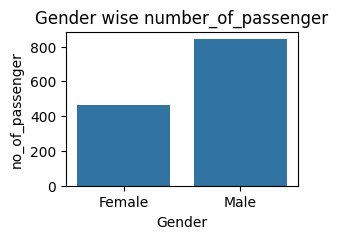

In [215]:
# figure customise the plot size height and width

plt.figure(figsize=(3,2)) # (w,h)
sns.countplot(df,x ='sex')  # seborn only to plot the graph,no custamisation can't done in sea born
                            # for customisation go foe matplotlib
plt.title("Gender wise number_of_passenger")
plt.xlabel('Gender')  # to change the name of axis
plt.ylabel("no_of_passenger") # to change the name of y axis
plt.show() # it should be in last always

# univariate plot where we will give only on axis

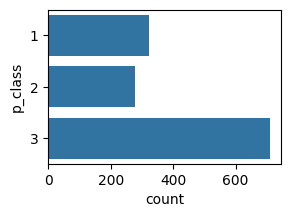

In [216]:
plt.figure(figsize=(3,2)) # to reduce the size
sns.countplot(df,y ='pclass') # seaborn only to plot the graph,no custamisation can't done in sea born
plt.xlabel('count')  # to change the name of axis
plt.ylabel("p_class") # to change the name of y axis


plt.show()

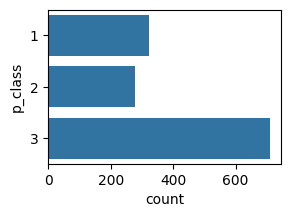

In [217]:
plt.figure(figsize=(3,2)) # to reduce the size
sns.countplot(df,y ='pclass') # seaborn only to plot the graph,no custamisation can't done in sea born
plt.xlabel('count')  # to change the name of axis
plt.ylabel("p_class") # to change the name of y axis


plt.show()

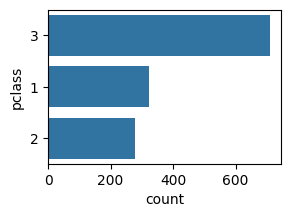

In [218]:
# to change the order then use like below using order parameter

o =df['pclass'].value_counts().index
plt.figure(figsize=(3,2)) # to reduce the size
sns.countplot(df,y ='pclass',order = o)  # when we have more number of  bars then we can use this method
plt.show()

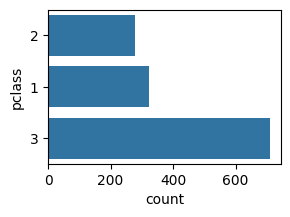

In [219]:
# one more alternate way to change the order

plt.figure(figsize=(3,2)) # to reduce the size
sns.countplot(df,y ='pclass',order = [2,1,3]) # when we have limited number of  bars then we can use this method
plt.show()


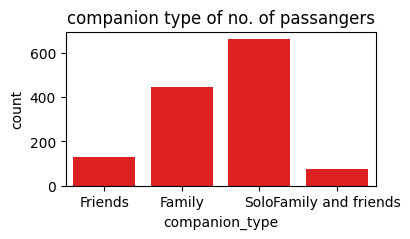

In [220]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='companion_type',color='red') # to change colour we can use colour = "...."
plt.title('companion type of no. of passangers')
plt.show()


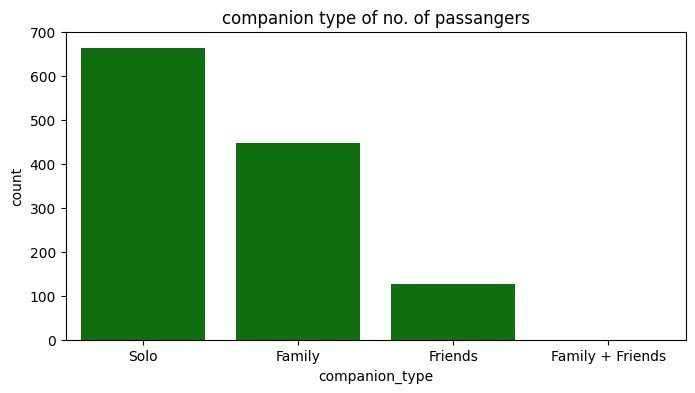

In [221]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='companion_type',color='green', order=['Solo','Family','Friends','Family + Friends']) # to change colour we can use colour = "...."
plt.yticks(range(0,701,100)) # 
plt.title('companion type of no. of passangers')
plt.show()

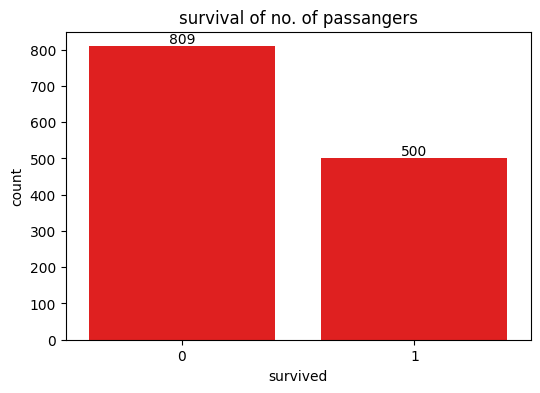

In [222]:
# how many people died and how many people survived

plt.figure(figsize=(6,4))
# to get the exact count then we need to use
c = sns.countplot(df,x='survived',color='red') # nedd to store inside variable then use "c.bar_lable"
c.bar_label(c.containers[0])  # container is just like collection which supports indexing
plt.title('survival of no. of passangers')
plt.show()

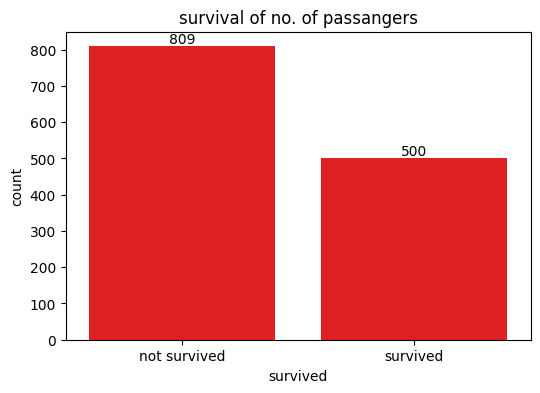

In [223]:
# how many people died and how many people survived

plt.figure(figsize=(6,4))
# to get the exact count then we need to use
c = sns.countplot(df,x='survived',color='red') # nedd to store inside variable then use "c.bar_lable"
c.bar_label(c.containers[0])  # container is just like collection which supports indexing

# lables to give lable to the values like 0,1 is replaced by 'not survived','survived'
plt.xticks(ticks=[0,1], labels=['not survived','survived']) # "xticks" changes the range, it supports range ,list also...
plt.title('survival of no. of passangers')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4172\2726028303.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(df,x='survived',color='red',hue='sex') # hue is used to colour based grouping , like to categorise


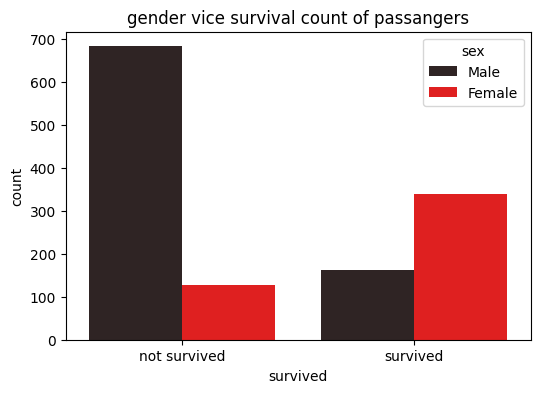

In [224]:
# to check how many male survived and and not survived in 'not survived','survived'

plt.figure(figsize=(6,4))
# to get the exact count then we need to use
sns.countplot(df,x='survived',color='red',hue='sex') # hue is used to colour based grouping , like to categorise
# lables to give lable to the values like 0,1 is replaced by 'not survived','survived'
plt.xticks(ticks=[0,1], labels=['not survived','survived']) # "xticks" changes the range, it supports range ,list also...
plt.title('gender vice survival count of passangers')
plt.show()

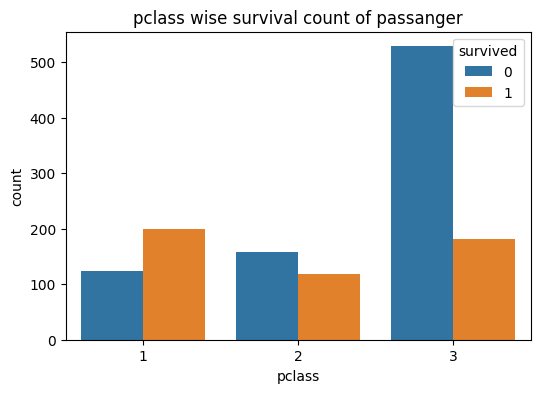

In [225]:
# passanger clase wise how many are survived and not

plt.figure(figsize=(6,4))
# to get the exact count then we need to use
sns.countplot(df,x='pclass',hue ='survived') 
# lables to give lable to the values like 0,1 is replaced by 'not survived','survived'
plt.title('pclass wise survival count of passanger')
plt.show()

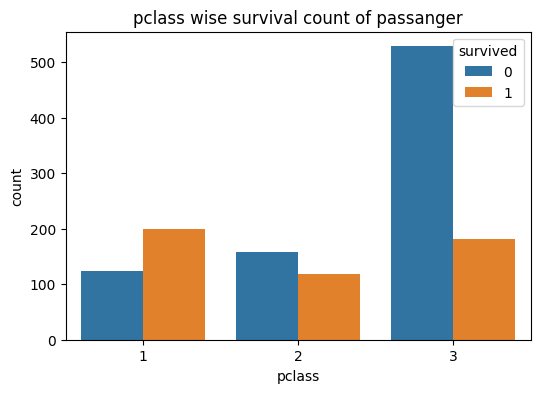

In [226]:
plt.figure(figsize=(6,4))
# to get the exact count then we need to use
sns.countplot(df,x='pclass',hue ='survived') 
# lables to give lable to the values like 0,1 is replaced by 'not survived','survived'
for i in c.containers:
    c.bar_label(i)
plt.title('pclass wise survival count of passanger')
plt.show()

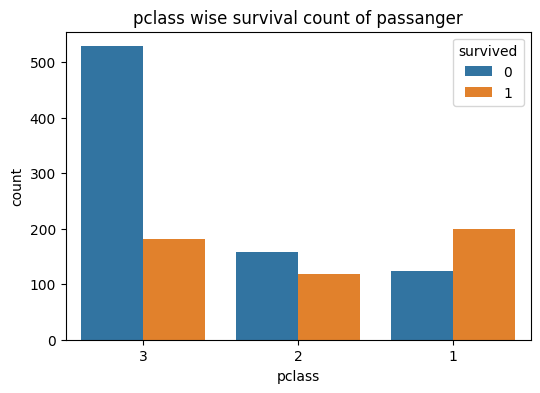

In [227]:
plt.figure(figsize=(6,4))
# to get the exact count then we need to use
sns.countplot(df,x='pclass',hue ='survived',order =[3,2,1]) 
for i in c.containers:
    c.bar_label(i)
plt.title('pclass wise survival count of passanger')
plt.show()
# 1 represent survived , 2 represent dided

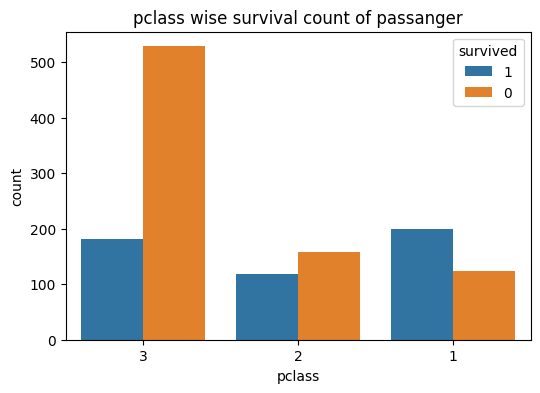

In [228]:
plt.figure(figsize=(6,4))
# to get the exact count then we need to use
sns.countplot(df,x='pclass',hue ='survived',order =[3,2,1],hue_order=[1,0]) 
for i in c.containers:
    c.bar_label(i)
plt.title('pclass wise survival count of passanger')
plt.show()
# 1 represent survived , 2 represent dided

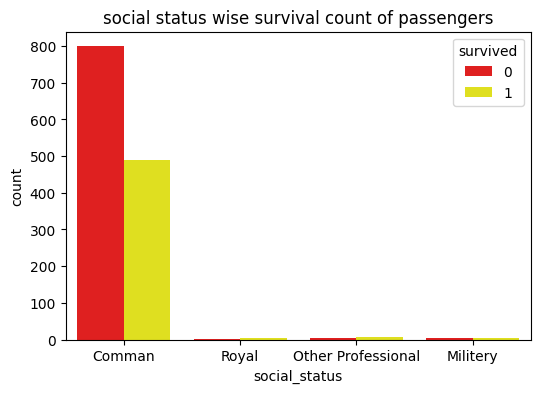

In [229]:
# social vice 

plt.figure(figsize=(6,4))
sns.countplot(df,x='social_status',hue ='survived',palette=['red','yellow']) # colour means "single colour",pallet = list of colours

# pallete means mulltiple colour we can give

plt.title('social status wise survival count of passengers')
plt.show()

In [230]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'embarked',
       'survived', 'lname', 'courtesy_title', 'fname', 'fam_cnt', 'psg_cnt',
       'companion_type', 'age_category', 'names', 'social_status'],
      dtype='object')

In [231]:
import numpy as np

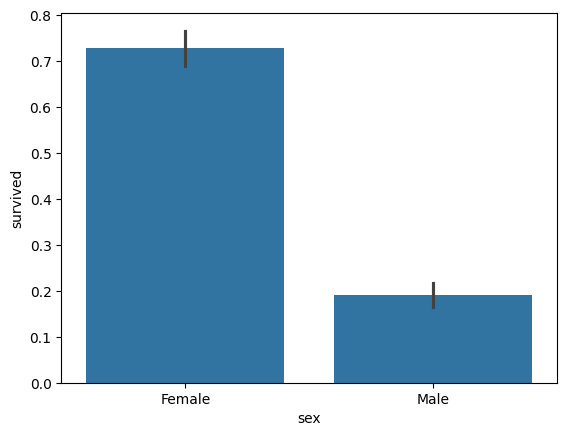

In [232]:
# grouping is done on x- axis, and aggrigation is done on y - axis...

plt.Figure(figsize=(3,2))
sns.barplot(df,x='sex', y='survived')  # mean(default)
plt.yticks(np.arange(0,0.9,0.1))
plt.show()

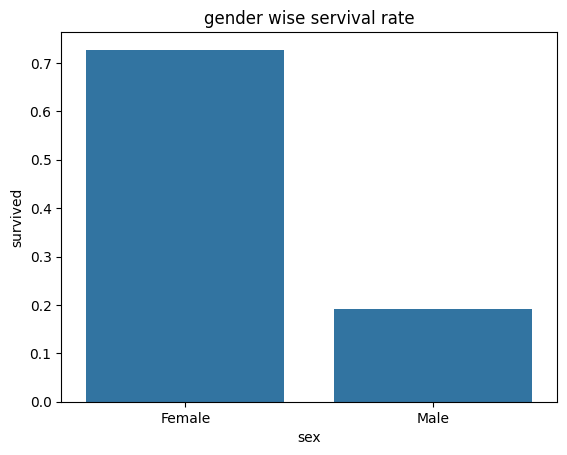

In [233]:
plt.Figure(figsize=(3,2))
sns.barplot(df,x='sex', y='survived',errorbar=None)  # mean(default), errorbar = which is usedto remove that line in top above the bar polts
plt.title("gender wise servival rate")
plt.show()

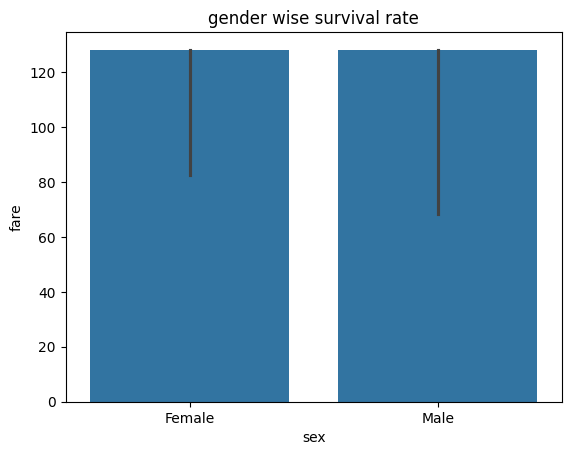

In [234]:
# insted of mean we need to change any other 
# mean(default)

plt.Figure(figsize=(3,2))
sns.barplot(df,x='sex', y='fare', estimator='max')  
plt.title('gender wise survival rate')
plt.show()

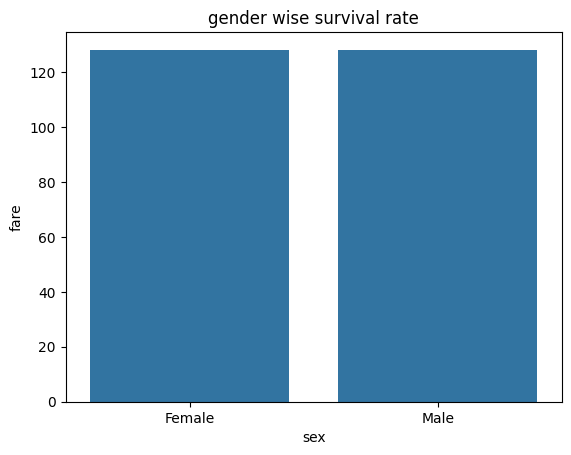

In [235]:

plt.Figure(figsize=(3,2))
sns.barplot(df,x='sex', y='fare', estimator='max',errorbar=None)  # to remove errorbar
plt.title('gender wise survival rate')
plt.show()

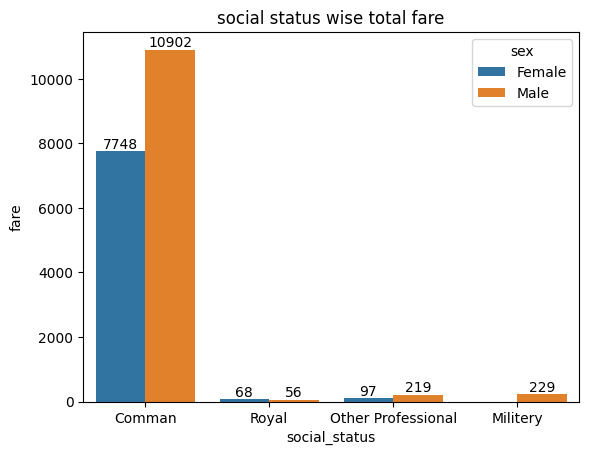

In [236]:
plt.Figure(figsize=(3,2))
b = sns.barplot(df,x='social_status',y='fare',hue ='sex', estimator= 'sum',errorbar=None) 
for i in b.containers:
    b.bar_label(i,fmt='%.0f') # fmt = format
plt.title('social status wise total fare')
plt.show()

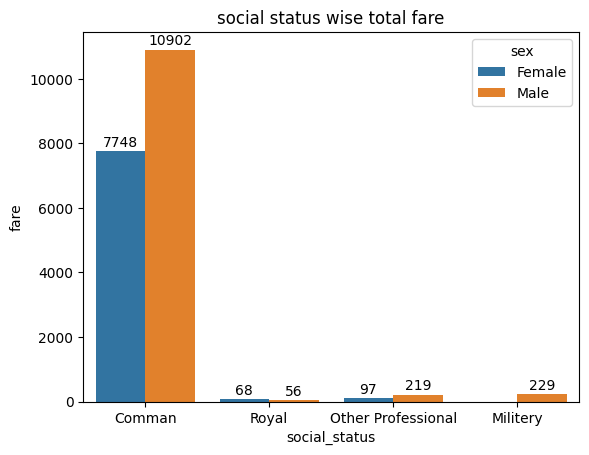

In [237]:
plt.Figure(figsize=(3,2))
b = sns.barplot(df,x='social_status',y='fare',hue ='sex', estimator= 'sum',errorbar=None) 
for i in b.containers:
    b.bar_label(i,fmt='%.0f',padding=1.05) # fmt = format
plt.title('social status wise total fare')
plt.show()

In [238]:
# try to move hue(ledend) plt.legend box position we should change
# right side top box change position and also 0,1, to survived and non survived

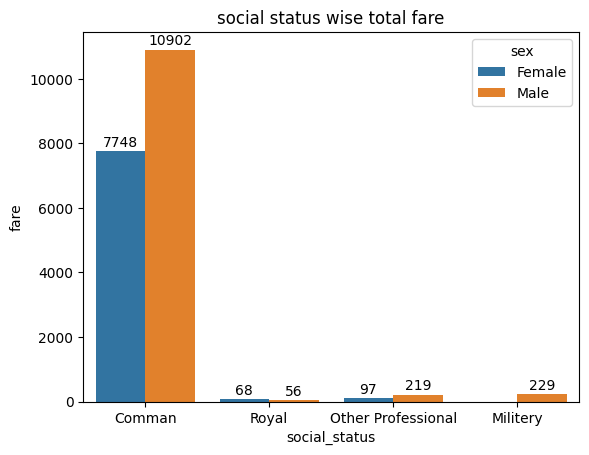

In [239]:
plt.Figure(figsize=(3,2))
b = sns.barplot(df,x='social_status',y='fare',hue ='sex', estimator= 'sum',errorbar=None) 
for i in b.containers:
    b.bar_label(i,fmt='%.0f',padding=1.05) # fmt = format
plt.title('social status wise total fare')
plt.legend(title ='sex',loc = 'upper right')
plt.show()


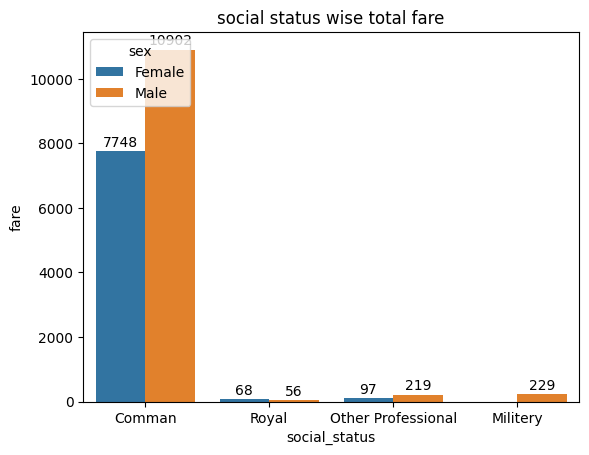

In [240]:
plt.Figure(figsize=(6,3))
b = sns.barplot(df,x='social_status',y='fare',hue ='sex', estimator= 'sum',errorbar=None) 
for i in b.containers:
    b.bar_label(i,fmt='%.0f',padding=1.05) # fmt = format
plt.title('social status wise total fare')
plt.legend(title ='sex',loc ='upper left')
plt.show()

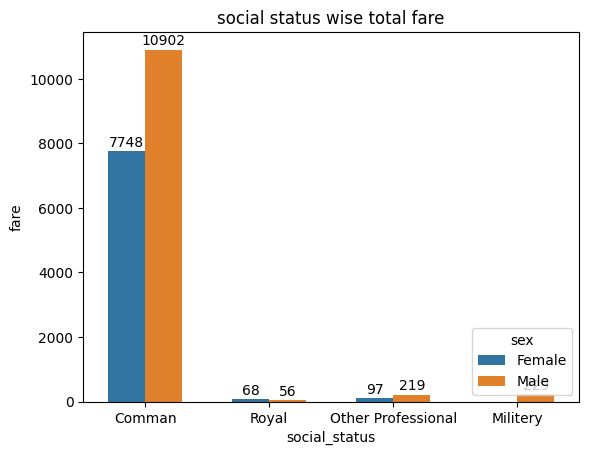

In [241]:
plt.Figure(figsize=(3,2))
b = sns.barplot(df,x='social_status',y='fare',hue ='sex', estimator= 'sum',errorbar=None, width = 0.6) 
for i in b.containers:
    b.bar_label(i,fmt='%.0f',padding=1.05) # fmt = format
plt.title('social status wise total fare')
plt.legend(title ='sex',loc ='lower right')
plt.show()

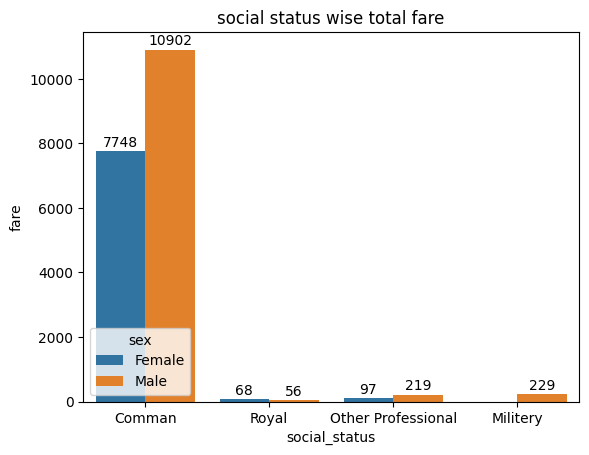

In [242]:
plt.Figure(figsize=(3,2))
b = sns.barplot(df,x='social_status',y='fare',hue ='sex', estimator= 'sum',errorbar=None) 
for i in b.containers:
    b.bar_label(i,fmt='%.0f',padding=1.05) # fmt = format
plt.title('social status wise total fare')
plt.legend(title ='sex',loc ='lower left')
plt.show()

# piechart

In [243]:
# piechart

df['sex']



0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
1304    Female
1305      Male
1306      Male
1307      Male
1308    Female
Name: sex, Length: 1309, dtype: object

In [244]:
df['sex'].value_counts() # to get the count of male and female

sex
Male      843
Female    466
Name: count, dtype: int64

In [245]:
gen_cnt =df['sex'].value_counts()

In [246]:
print(gen_cnt.index)
print(gen_cnt.values)

Index(['Male', 'Female'], dtype='object', name='sex')
[843 466]


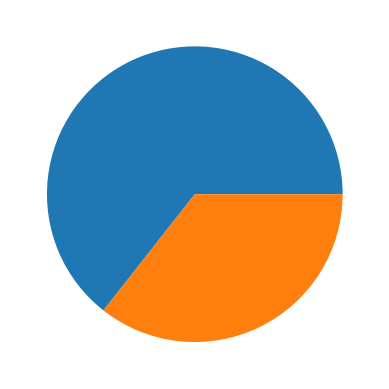

In [247]:
plt.Figure(figsize=(3,2))
plt.pie(x = gen_cnt.values)
plt.show()

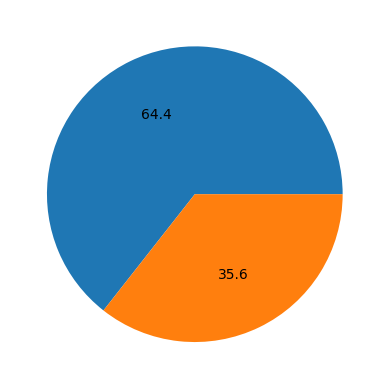

In [248]:
plt.Figure(figsize=(3,2))
plt.pie(x = gen_cnt.values,autopct='%.1f') # to get numbers
plt.show()

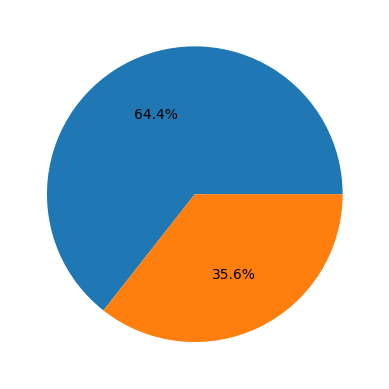

In [249]:
plt.Figure(figsize=(3,2))
plt.pie(x = gen_cnt.values,autopct='%.1f%%') # to get numbers
plt.show()
# blue represent male and orrange represent female

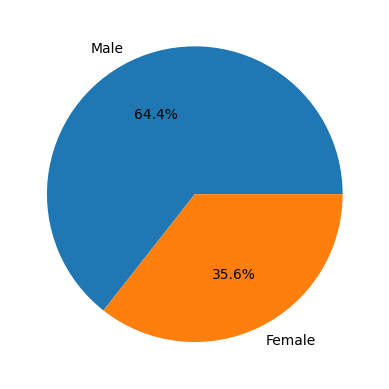

In [250]:
plt.Figure(figsize=(3,2))
plt.pie(x = gen_cnt.values,autopct='%.1f%%',labels=gen_cnt.index) # to get numbers
        # to get the values                 # to get the lables
plt.show()

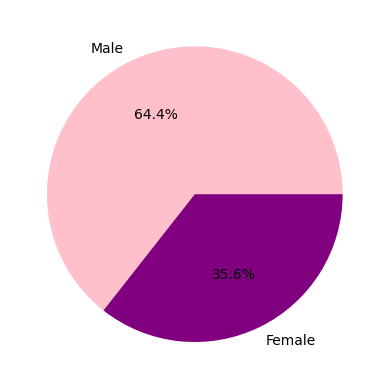

In [251]:
plt.Figure(figsize=(3,2))
plt.pie(x = gen_cnt.values,autopct='%.1f%%',labels=gen_cnt.index,colors=['pink','purple']) # to get numbers,to get the lables,to change the colours
        # to get the values                 # to get the lables
plt.show()

# scatter plot

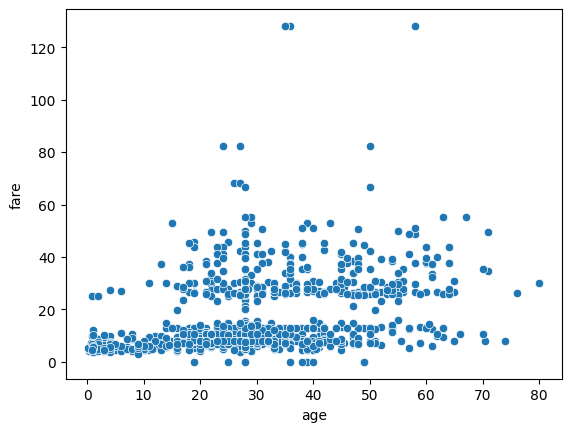

In [252]:
# placing the "dots" on graph with respect to x axis and y axis

# scatter polts basically used to understand relation ship between two variables

plt.Figure(figsize=(3,2))
sns.scatterplot(df, x= 'age', y ='fare')
plt.show()

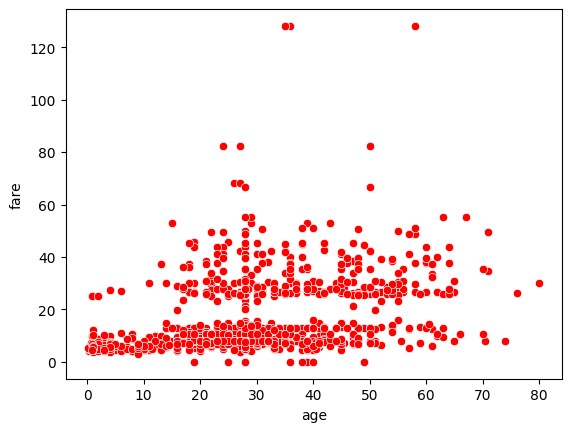

In [253]:

plt.Figure(figsize=(3,2))
sns.scatterplot(df, x= 'age', y ='fare',color ='red') # to give the colour
plt.show()

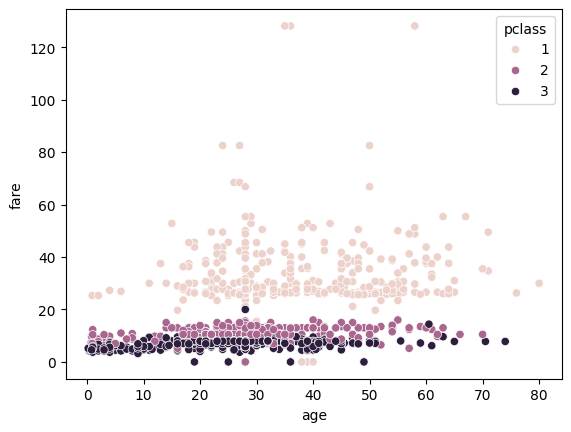

In [254]:
plt.Figure(figsize=(3,2))
sns.scatterplot(df, x= 'age', y ='fare',color ='blue',hue = 'pclass') # to give the colour
plt.show()

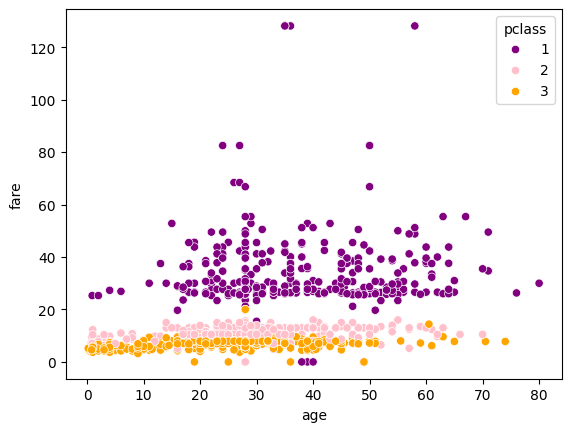

In [255]:
plt.Figure(figsize=(3,2))
sns.scatterplot(df, x= 'age', y ='fare',hue = 'pclass',palette=['purple','pink','orange']) 
# if you dont like the colour combination the use "palete"
plt.show()

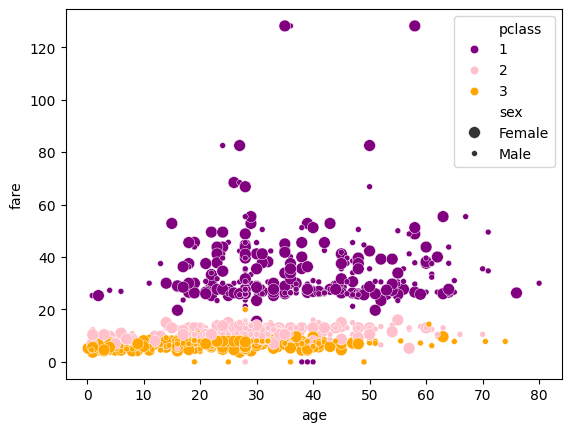

In [256]:
plt.Figure(figsize=(3,2))
sns.scatterplot(df, x= 'age', y ='fare',hue = 'pclass',size ='sex',palette=['purple','pink','orange']) # sub cateagary based on size of doat
plt.show()

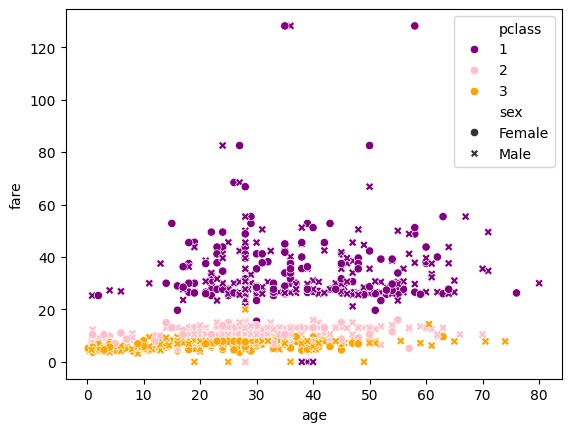

In [257]:
plt.Figure(figsize=(3,2))
sns.scatterplot(df, x= 'age', y ='fare',hue = 'pclass',style = 'sex',palette=['purple','pink','orange']) # style to get the different symbols for identified
plt.show()

# heatmap

In [258]:
df.corr(numeric_only=True)

,pclass,age,sibsp,parch,fare,survived,fam_cnt,psg_cnt
pclass,1.000000,-0.377902,0.060832,0.018322,-0.770929,-0.312469,0.050027,-0.078554
age,-0.377902,1.000000,-0.189960,-0.125855,0.345225,-0.043817,-0.193736,-0.152253
sibsp,0.060832,-0.189960,1.000000,0.373587,-0.050887,-0.027825,0.861952,0.679444
parch,0.018322,-0.125855,0.373587,1.000000,-0.030490,0.082660,0.792296,0.647029
fare,-0.770929,0.345225,-0.050887,-0.030490,1.000000,0.265753,-0.050136,0.094211
survived,-0.312469,-0.043817,-0.027825,0.082660,0.265753,1.000000,0.026876,0.075293
fam_cnt,0.050027,-0.193736,0.861952,0.792296,-0.050136,0.026876,1.000000,0.800556
psg_cnt,-0.078554,-0.152253,0.679444,0.647029,0.094211,0.075293,0.800556,1.000000


In [259]:
cr =df.corr(numeric_only=True)
cr

,pclass,age,sibsp,parch,fare,survived,fam_cnt,psg_cnt
pclass,1.000000,-0.377902,0.060832,0.018322,-0.770929,-0.312469,0.050027,-0.078554
age,-0.377902,1.000000,-0.189960,-0.125855,0.345225,-0.043817,-0.193736,-0.152253
sibsp,0.060832,-0.189960,1.000000,0.373587,-0.050887,-0.027825,0.861952,0.679444
parch,0.018322,-0.125855,0.373587,1.000000,-0.030490,0.082660,0.792296,0.647029
fare,-0.770929,0.345225,-0.050887,-0.030490,1.000000,0.265753,-0.050136,0.094211
survived,-0.312469,-0.043817,-0.027825,0.082660,0.265753,1.000000,0.026876,0.075293
fam_cnt,0.050027,-0.193736,0.861952,0.792296,-0.050136,0.026876,1.000000,0.800556
psg_cnt,-0.078554,-0.152253,0.679444,0.647029,0.094211,0.075293,0.800556,1.000000


<Axes: >

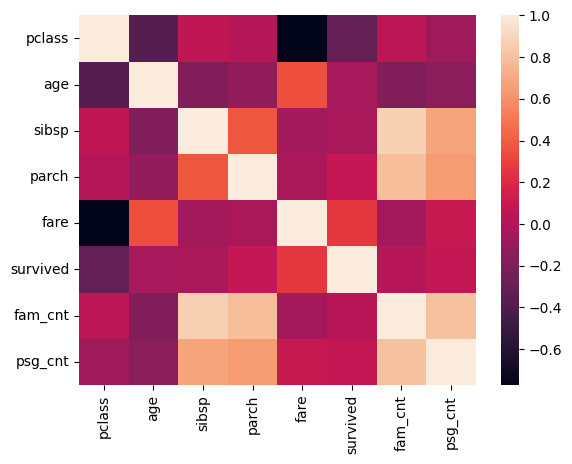

In [260]:
# for heat map figure size not works becouse its like default table

sns.heatmap(cr)
#which is not showing number inside the block

<Axes: >

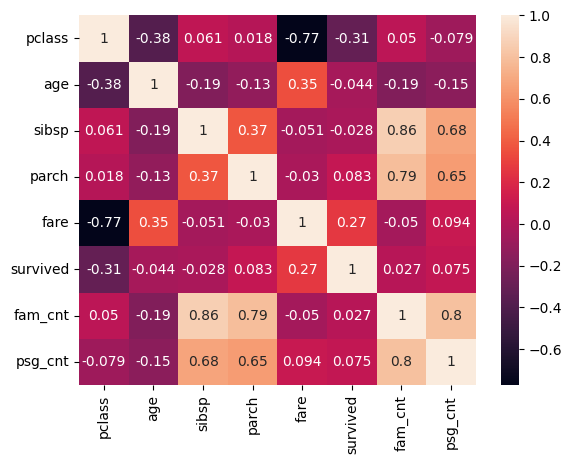

In [261]:
# to get the number inside the block use annot = true
sns.heatmap(cr,annot=True)# to get the number inside the block


In [262]:
# negative number represent inversly propotinnol
# positive number meand directly proportinol
# the number near to "zero" is weaker relation
# the number near to "-1 or +1 " is strong relation

# "zero" represent no relation ( columns are independent)
# "one" represenr 100% dependency

In [ ]:
df['sex'].replace ({'Male':0,'Female':1}) #  replaacess male by 0 and female by 1

C:\Users\HP\AppData\Local\Temp\ipykernel_4172\2513017819.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'].replace ({'Male':0,'Female':1})


0       1
1       1
2       1
3       1
4       1
       ..
1304    1
1305    0
1306    0
1307    0
1308    1
Name: sex, Length: 1309, dtype: int64

In [270]:

df1 = df[['age','survived','pclass','fare']]
df1['gender']= df['sex'].replace ({'Male':0,'Female':1})
df1

# here we created new table to avoid confusion , 
# it will not effect my main data frame i.e df

C:\Users\HP\AppData\Local\Temp\ipykernel_4172\2895931760.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender']= df['sex'].replace ({'Male':0,'Female':1})
C:\Users\HP\AppData\Local\Temp\ipykernel_4172\2895931760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender']= df['sex'].replace ({'Male':0,'Female':1})


,age,survived,pclass,fare,gender
0,30.0,1,1,28.8,1
1,33.0,1,1,28.8,1
2,16.0,1,1,28.8,1
3,18.0,1,1,26.5,1
4,39.0,1,1,26.5,1
...,...,...,...,...,...
1304,47.0,1,1,30.6,1
1305,46.0,0,1,30.6,0
1306,30.0,0,2,10.5,0
1307,70.0,0,1,35.5,0


In [272]:
df1.corr()

,age,survived,pclass,fare,gender
age,1.000000,-0.043817,-0.377902,0.345225,-0.053651
survived,-0.043817,1.000000,-0.312469,0.265753,0.528693
pclass,-0.377902,-0.312469,1.000000,-0.770929,-0.124617
fare,0.345225,0.265753,-0.770929,1.000000,0.121955
gender,-0.053651,0.528693,-0.124617,0.121955,1.000000


# box plot

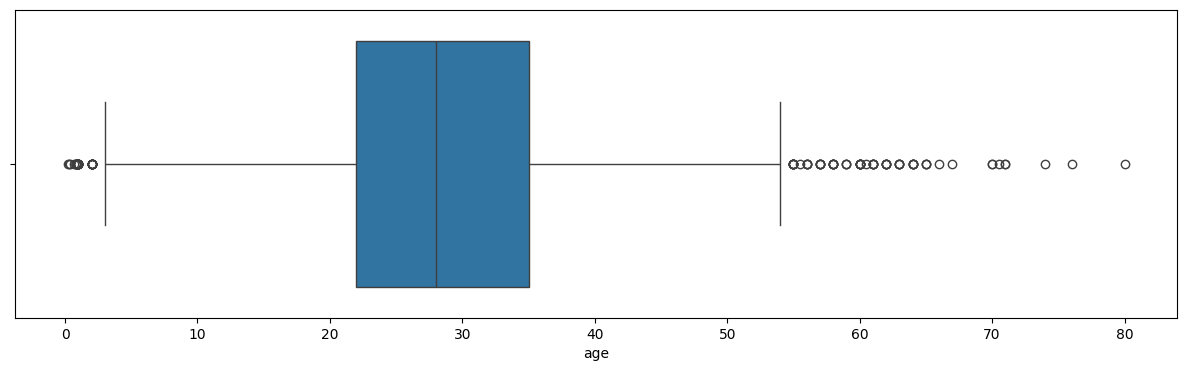

In [ ]:
#  box is known as "inter qurtle range"(IQR)
plt.figure(figsize=(15,4))
sns.boxplot(df,x='age')
plt.show()

# 

# performe percentail method 

# CONCLUSION (over all analysis)

In [263]:
# summary of the new observation we got after analysis.